Análise 1 — Distribuição de Bolsistas por Instituição

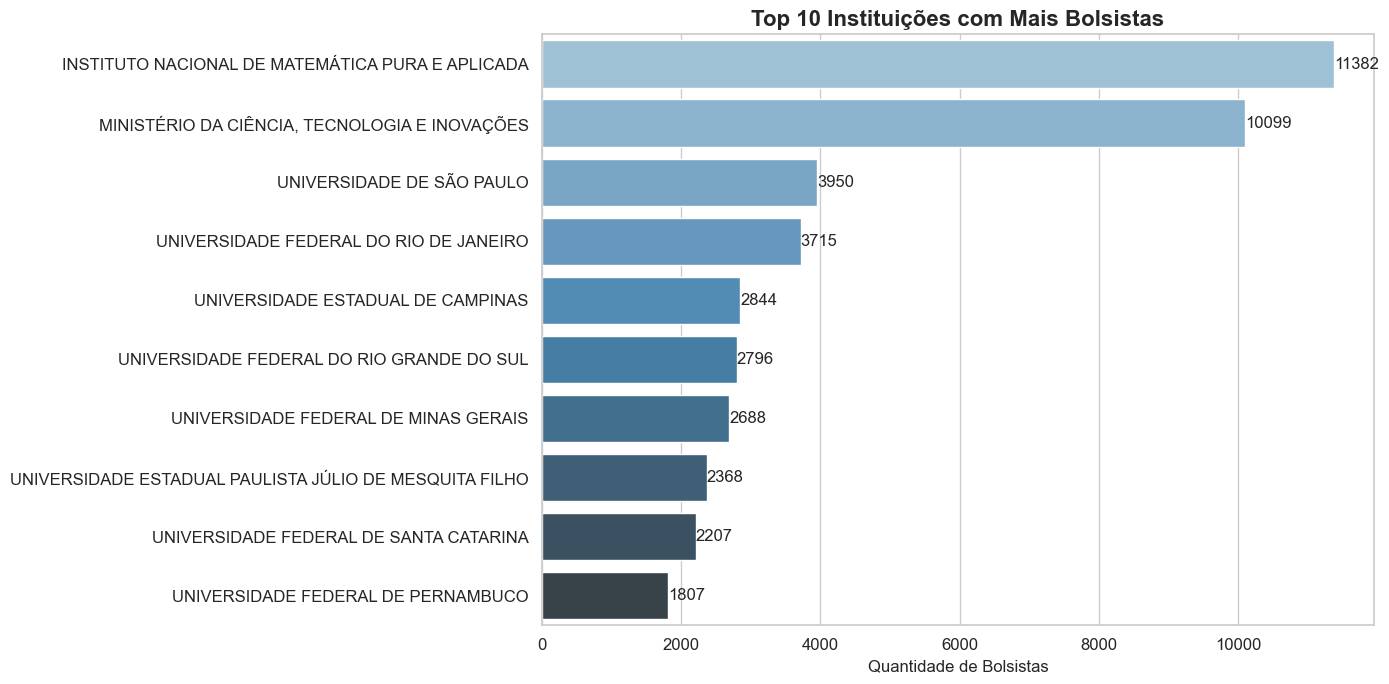

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual técnico
sns.set(style="whitegrid")

# Carregar dados
inep = pd.read_csv("C:/Users/cynth/OneDrive/Área de Trabalho/Desafio_Eng._Dados_FADESP/data/processed/inep_tratado.csv")

# Ajustar valores monetários
inep['VALOR_PAGO'] = (
    inep['VALOR_PAGO']
    .astype(str)
    .str.replace("R\$", "", regex=True)
    .str.replace(".", "", regex=False)
    .str.replace(",", ".", regex=False)
)
inep['VALOR_PAGO'] = pd.to_numeric(inep['VALOR_PAGO'], errors='coerce')
inep = inep.dropna(subset=['VALOR_PAGO'])

# Padronizar nomes das instituições
inep["NOME_INSTITUICAO"] = inep["NOME_INSTITUICAO"].str.upper()

# Agrupar quantidade de bolsistas
bolsistas_por_ies = inep.groupby("NOME_INSTITUICAO").size().reset_index(name="QTD_BOLSISTAS")

# Top 10 instituições
top10 = bolsistas_por_ies.sort_values(by="QTD_BOLSISTAS", ascending=False).head(10)

# Gráfico
plt.figure(figsize=(14, 7))
barplot = sns.barplot(
    x="QTD_BOLSISTAS",
    y="NOME_INSTITUICAO",
    hue="NOME_INSTITUICAO",  # para habilitar o uso de palette
    data=top10,
    palette="Blues_d",
    legend=False  # oculta legenda desnecessária
)

# Estética
plt.title("Top 10 Instituições com Mais Bolsistas", fontsize=16, fontweight='bold')
plt.xlabel("Quantidade de Bolsistas", fontsize=12)
plt.ylabel("")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar os valores nas barras
for i, v in enumerate(top10["QTD_BOLSISTAS"]):
    plt.text(v + 2, i, str(v), va='center', fontsize=12)

plt.tight_layout()
plt.show()
